In [1]:
import folium
from tqdm import tqdm
import math
from scripts import *
from utils import *

import os
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
import cv2
import ee


In [182]:
grid = 1
box_dim = 5 # km
min_lat, min_lon  = 33.23119, 75.18916
start_date = "2024-05-01"
end_date = "2024-05-06"
project_name = 'Pernote'
os.makedirs(project_name, exist_ok=True)

In [181]:
grid = 1
box_dim = 5 # km
min_lat, min_lon  = 12.984220, 80.153125
start_date = "2024-04-19"
end_date = "2024-05-24"
project_name = 'Chennai Airport'
os.makedirs(project_name, exist_ok=True)

In [183]:
g = generate_grid(min_lat, min_lon, distance=box_dim*1000, grid_side=grid)

m = folium.Map(
    location=(min_lat, min_lon),
    zoom_start=15,
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr='Esri'
)
for i in range(len(g)):
    folium.Rectangle([(g[i][:2]), (g[i][2:])], color='red', fill='pink',fill_opcity=0.5).add_to(m)

m

In [ ]:
NDVI_Before = get_images(km=box_dim, grid=g, grid_dim=grid, script=evalscript_NDVI, 
           date_start=start_date, date_end=start_date, res=1000, 
           box_dim=box_dim, file_name=f"{project_name}/{project_name}-NDVI-Before")

NDVI_After = get_images(km=box_dim, grid=g, grid_dim=grid, script=evalscript_NDVI, 
           date_start=end_date, date_end=end_date, res=1000, 
           box_dim=box_dim, file_name=f"{project_name}/{project_name}-NDVI-After")

True_Color_After = get_images(km=box_dim, grid=g, grid_dim=grid, script=evalscript_True_Color, 
           date_start=end_date, date_end=end_date, res=1000, 
           box_dim=box_dim, file_name=f"{project_name}/{project_name}-True_Color-After")

LSM_Only_After = get_images(km=box_dim, grid=g, grid_dim=grid, script=evalscript_lsm_only, 
           date_start=end_date, date_end=end_date, res=1000, 
           box_dim=box_dim, file_name=f"{project_name}/{project_name}-LSM_Only-After")


0 0 [33.23119, 75.18916, 33.249176432118375, 75.21066288197972] -> 0 1000 0 1000
Saved: Pernote/Pernote-NDVI-Before.png
0 1 [33.23119, 75.21066288197972, 33.249176432118375, 75.23216576395943] -> 0 1000 1000 2000
Saved: Pernote/Pernote-NDVI-Before.png
----
1 0 [33.21320356788162, 75.18916, 33.23119, 75.21066288197972] -> 1000 2000 0 1000
Saved: Pernote/Pernote-NDVI-Before.png
1 1 [33.21320356788162, 75.21066288197972, 33.23119, 75.23216576395943] -> 1000 2000 1000 2000
Saved: Pernote/Pernote-NDVI-Before.png
----
0 0 [33.23119, 75.18916, 33.249176432118375, 75.21066288197972] -> 0 1000 0 1000
Saved: Pernote/Pernote-NDVI-After.png
0 1 [33.23119, 75.21066288197972, 33.249176432118375, 75.23216576395943] -> 0 1000 1000 2000
Saved: Pernote/Pernote-NDVI-After.png
----
1 0 [33.21320356788162, 75.18916, 33.23119, 75.21066288197972] -> 1000 2000 0 1000
Saved: Pernote/Pernote-NDVI-After.png
1 1 [33.21320356788162, 75.21066288197972, 33.23119, 75.23216576395943] -> 1000 2000 1000 2000
Saved: Pern

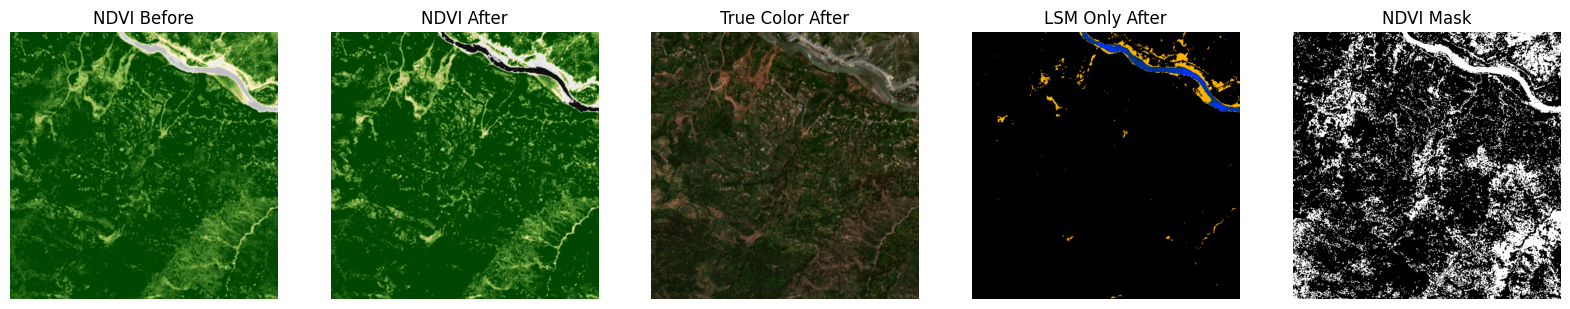

In [173]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 5, 1)
plt.title("NDVI Before")
plt.imshow(NDVI_Before); plt.axis("off")

plt.subplot(1, 5, 2)
plt.title("NDVI After")
plt.imshow(NDVI_After); plt.axis("off")

plt.subplot(1, 5, 3)
plt.title("True Color After")
plt.imshow(True_Color_After); plt.axis("off")

plt.subplot(1, 5, 4)
plt.title("LSM Only After")
plt.imshow(LSM_Only_After); plt.axis("off")

diff = NDVI_Before - NDVI_After
threshold = 10
mask = ((NDVI_Before > NDVI_After) & (diff > threshold)).astype(np.uint8) * 255
mask = cv2.threshold(cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY), 0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

plt.subplot(1, 5, 5)
plt.title("NDVI Mask")
plt.imshow(mask, cmap='gray'); plt.axis("off")

plt.show()

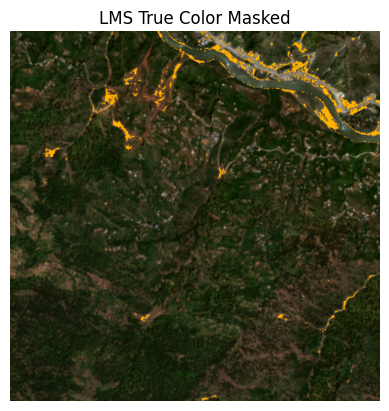

In [184]:
LMS_True_Color_dNDVI_Masked = merge_images(True_Color_After, LSM_Only_After, mask)
plt.imshow(LMS_True_Color_dNDVI_Masked); plt.axis("off")
plt.title("LMS True Color Masked")
plt.imsave(f"{project_name}/{project_name}-LMS_True_Color_dNDVI_Masked.png", LMS_True_Color_dNDVI_Masked)